In [9]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[]

In [4]:
import cv2
import imghdr

In [5]:
data_dir = 'pneumonia' 

In [6]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [7]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [10]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 140 files belonging to 2 classes.


In [11]:
data_iterator = data.as_numpy_iterator()

In [12]:
batch = data_iterator.next()

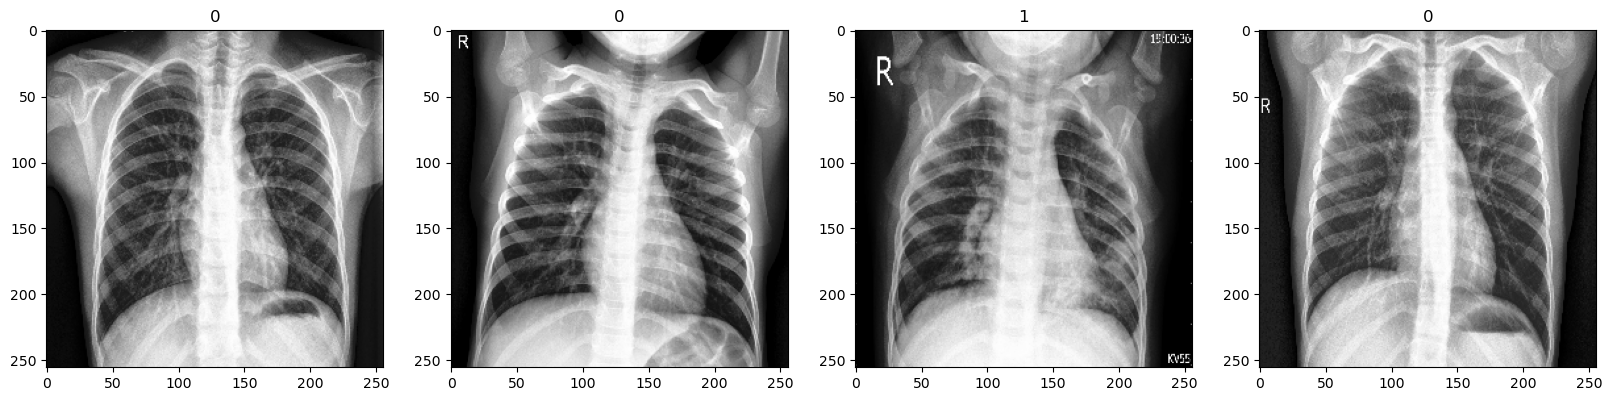

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [14]:
data = data.map(lambda x,y: (x/255, y))

In [15]:
data.as_numpy_iterator().next()

(array([[[[2.69730221e-02, 2.69730221e-02, 2.69730221e-02],
          [3.13725509e-02, 3.13725509e-02, 3.13725509e-02],
          [2.08103545e-02, 2.08103545e-02, 2.08103545e-02],
          ...,
          [7.84313772e-03, 7.84313772e-03, 7.84313772e-03],
          [7.84313772e-03, 7.84313772e-03, 7.84313772e-03],
          [6.64062519e-03, 6.64062519e-03, 6.64062519e-03]],
 
         [[2.28952747e-02, 2.28952747e-02, 2.28952747e-02],
          [2.74509806e-02, 2.74509806e-02, 2.74509806e-02],
          [2.41574757e-02, 2.41574757e-02, 2.41574757e-02],
          ...,
          [7.84313772e-03, 7.84313772e-03, 7.84313772e-03],
          [7.84313772e-03, 7.84313772e-03, 7.84313772e-03],
          [4.29080147e-03, 4.29080147e-03, 4.29080147e-03]],
 
         [[2.53599882e-02, 2.53599882e-02, 2.53599882e-02],
          [2.53599882e-02, 2.53599882e-02, 2.53599882e-02],
          [2.40042899e-02, 2.40042899e-02, 2.40042899e-02],
          ...,
          [0.00000000e+00, 0.00000000e+00, 0.0000

In [16]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [17]:
train_size

3

In [18]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [19]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [39]:
model = Sequential()

In [40]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [41]:

model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
logdir='logs'

In [44]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [45]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 608ms/step - accuracy: 0.5052 - loss: 0.7525 - val_accuracy: 0.5938 - val_loss: 0.6581
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 454ms/step - accuracy: 0.5104 - loss: 0.7085 - val_accuracy: 0.6250 - val_loss: 0.6479
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 468ms/step - accuracy: 0.7357 - loss: 0.6346 - val_accuracy: 0.7500 - val_loss: 0.5486
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 471ms/step - accuracy: 0.8698 - loss: 0.4876 - val_accuracy: 0.8750 - val_loss: 0.3779
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 462ms/step - accuracy: 0.8815 - loss: 0.3426 - val_accuracy: 0.7812 - val_loss: 0.3394
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 455ms/step - accuracy: 0.8815 - loss: 0.2452 - val_accuracy: 0.8750 - val_loss: 0.2412
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 473ms/step - accuracy: 0.8971 - loss: 0.2564 - val_accuracy: 0.9375 - val_loss: 0.1517
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 438ms/step - accuracy: 0.9635 - loss: 0.1338 - val_accuracy: 0.9375 - val_loss: 0.1786
Epo

In [2]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

NameError: name 'hist' is not defined

<Figure size 640x480 with 0 Axes>

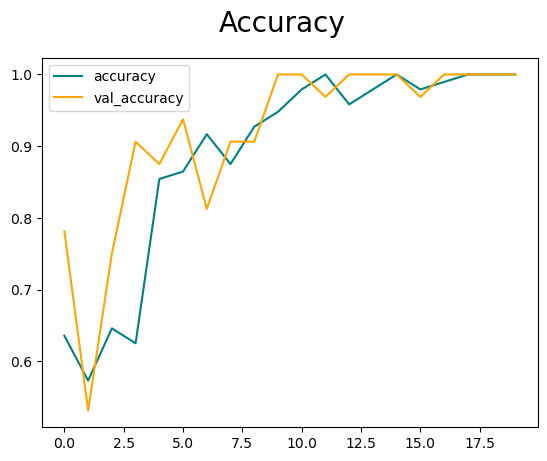

In [37]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [38]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [12]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [54]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [55]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


In [56]:
import cv2

TypeError: Image data of dtype object cannot be converted to float

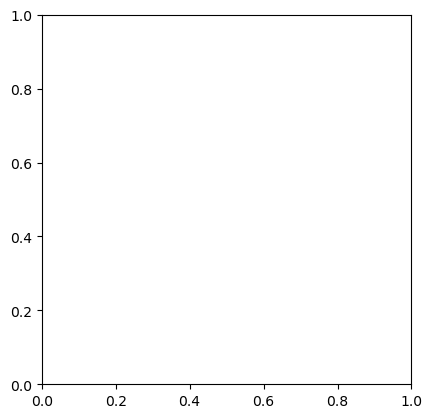

In [57]:
img = cv2.imread('0115.jpeg')
plt.imshow(img)
plt.show()

In [58]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

ValueError: Attempt to convert a value (None) with an unsupported type (<class 'NoneType'>) to a Tensor.

In [59]:
yhat = model.predict(np.expand_dims(resize/255, 0))


NameError: name 'resize' is not defined

In [60]:
yhat

array([[1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.]], dtype=float32)

In [61]:
if yhat > 0.5: 
    print(f'Predicted class is Normal')
else:
    print(f'Predicted class is Covid')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [2]:
from tensorflow.keras.models import load_model

In [63]:
model.save(os.path.join('models','imageclassifier.keras'))

In [3]:
new_model = load_model('models/imageclassifier.keras')

In [65]:
new_model.predict(np.expand_dims(resize/255, 0))

NameError: name 'resize' is not defined

In [7]:
data = tf.keras.utils.image_dataset_from_directory('testp')

Found 40 files belonging to 2 classes.


In [13]:
for batch in data.as_numpy_iterator(): 
    X, y = batch
    yhat = new_model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


In [16]:
acc.result().numpy()

0.725

In [42]:
from keras.models import load_model
m = load_model("models/imageclassifier.keras")

In [1]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

NameError: name 'hist' is not defined

<Figure size 640x480 with 0 Axes>